# Predict which features and factors indicate that there are more number of tobacco smokers who quit in 12 months

# I will try to optimize the original version of the notebook by trying other methods of regression.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the dataset
data = pd.read_csv('/kaggle/input/youth-tobacco-survey/datafile.csv')
data.shape

(107, 59)

In [2]:
data.head()

,State/UT,Area,Ever tobacco users (%),Current tobacco users (%),Ever tobacco smokers (%),Current tobacco smokers (%),Ever cigarette users (%),Current cigarette users (%),Ever bidi users (%),Current bidi users (%),...,Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%),Students who were taught in class about harmful effects of tobacco use during past 12 months (%),Students who thought it is difficult to quit once someone starts smoking tobacco (%),Students who thought other people’s tobacco smoking is harmful to them (%),Students who favoured ban on smoking inside enclosed public places (%),Students who favoured ban on smoking at outdoor public places (%),"School heads aware of COTPA, 2003 (%)","Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003 (%)",Schools followed ‘tobacco-free school’ guidelines (%),Schools aware of the policy for displaying ‘tobacco-free school’ board (%)
0,India,Total,18.1,8.5,11.0,7.3,4.6,2.6,4.1,2.1,...,17.5,37.8,26.0,70.6,58.1,60.5,85.4,38.2,82.1,82.5
1,India,Urban,13.5,5.5,8.1,4.5,4.1,2.3,3.7,1.9,...,16.3,34.1,30.1,73.3,64.8,67.4,86.9,36.4,82.4,83.0
2,India,Rural,19.5,9.4,11.8,8.1,4.7,2.6,4.3,2.2,...,17.8,38.9,24.8,69.8,56.1,58.6,84.6,39.2,81.9,82.2
3,Andaman and Nicobar Islands,Total,21.5,4.4,8.8,3.7,4.4,1.3,2.7,1.0,...,21.1,23.4,23.0,69.0,65.0,60.6,88.6,1.1,76.0,67.9
4,Andaman and Nicobar Islands,Urban,13.3,3.4,6.5,2.6,3.7,1.3,2.0,0.7,...,20.2,25.7,26.9,66.6,65.1,60.9,89.1,0.0,85.3,42.5


In [3]:
data.columns

Index(['State/UT', 'Area', 'Ever tobacco users (%)',
       'Current tobacco users (%)', 'Ever tobacco smokers (%)',
       'Current tobacco smokers (%)', 'Ever cigarette users (%)',
       'Current cigarette users (%)', 'Ever bidi users (%) ',
       'Current bidi users (%)', 'Ever smokeless tobacco users (%)',
       'Current smokeless tobacco users (%)',
       'Ever users of  paan masala together with tobacco (%)',
       'Never cigarette smokers susceptible to cigarette use in future (%)',
       'Median age of initiation of Cigarette (in years)',
       'Median age of initiation of Bidi (in years)',
       'Median age of initiation of smokeless tobacco (in years)',
       'Awareness about e-cigarette (%)', 'Ever e-cigarette use (%)',
       'Ever tobacco smokers who quit in last 12 months (%)',
       'Current tobacco smokers who tried to quit smoking in the past 12 months (%)',
       'Current tobacco smokers who wanted to quit smoking now   (%)',
       'Ever  smokeless tobacco

**Using Linear Regression as a base model to calculate MSE**

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Select the columns you want to use as features
features = ['Ever tobacco users (%)', 'Current tobacco users (%)', 'Ever tobacco smokers (%)', 'Current tobacco smokers (%)', 'Ever cigarette users (%)', 'Current cigarette users (%)', 'Ever bidi users (%) ', 'Current bidi users (%)', 'Ever smokeless tobacco users (%)', 'Current smokeless tobacco users (%)', 'Never cigarette smokers susceptible to cigarette use in future (%)']

# Select the column you want to predict
target = 'Ever tobacco smokers who quit in last 12 months (%)'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse:.2f}')

# Show the coefficients for each feature
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coefficients)


Mean squared error: 122.24
                                              Feature  Coefficient
0                              Ever tobacco users (%)    -0.091259
1                           Current tobacco users (%)     0.485413
2                            Ever tobacco smokers (%)    -3.178644
3                         Current tobacco smokers (%)     1.821468
4                            Ever cigarette users (%)     0.470871
5                         Current cigarette users (%)     2.314636
6                                Ever bidi users (%)      3.466410
7                              Current bidi users (%)    -4.462856
8                    Ever smokeless tobacco users (%)     0.503748
9                 Current smokeless tobacco users (%)    -0.887468
10  Never cigarette smokers susceptible to cigaret...    -0.216014


**Select 10 best features**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression




features = ['Ever tobacco users (%)', 'Current tobacco users (%)', 'Ever tobacco smokers (%)', 'Current tobacco smokers (%)', 'Ever cigarette users (%)', 'Current cigarette users (%)', 'Ever bidi users (%) ', 'Current bidi users (%)', 'Ever smokeless tobacco users (%)', 'Current smokeless tobacco users (%)', 'Never cigarette smokers susceptible to cigarette use in future (%)']
target = 'Ever tobacco smokers who quit in last 12 months (%)'


X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2)

# Select the k best features using f_regression as the scoring function
k = 10
selector = SelectKBest(f_regression, k=k)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)


model = LinearRegression()
model.fit(X_train_new, y_train)


y_pred = model.predict(X_test_new)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse:.2f}')

# Show the selected features
selected_features = [features[i] for i in selector.get_support(indices=True)]
print(f'Selected features: {selected_features}')


Mean squared error: 221.96
Selected features: ['Ever tobacco users (%)', 'Current tobacco users (%)', 'Ever tobacco smokers (%)', 'Current tobacco smokers (%)', 'Ever cigarette users (%)', 'Current cigarette users (%)', 'Ever bidi users (%) ', 'Current bidi users (%)', 'Ever smokeless tobacco users (%)', 'Current smokeless tobacco users (%)']


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Select the columns you want to use as features
features = ['Ever tobacco users (%)', 'Current tobacco users (%)', 'Ever tobacco smokers (%)', 'Current tobacco smokers (%)', 'Ever cigarette users (%)', 'Current cigarette users (%)', 'Ever bidi users (%) ', 'Current bidi users (%)', 'Ever smokeless tobacco users (%)', 'Current smokeless tobacco users (%)']
# Select the column you want to predict
target = 'Ever tobacco smokers who quit in last 12 months (%)'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2)

# Define the models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}

# Fit and evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the mean absolute error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate the root mean squared error (RMSE)
    mse = (mean_squared_error(y_test, y_pred))

    # Print the results
    print(f'{name}:')
    print(f'  MAE: {mae:.2f}')
    print(f'  MSE: {mse:.2f}')



Linear Regression:
  MAE: 8.39
  MSE: 137.26
Ridge Regression:
  MAE: 8.27
  MSE: 131.51
Lasso Regression:
  MAE: 6.85
  MSE: 75.78
Elastic Net Regression:
  MAE: 7.08
  MSE: 80.59
Decision Tree Regression:
  MAE: 12.95
  MSE: 476.94
Random Forest Regression:
  MAE: 7.23
  MSE: 82.64
Gradient Boosting Regression:
  MAE: 9.38
  MSE: 174.74


# Now lets utilize all the features in the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 59 columns):
 #   Column                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                 --------------  -----  
 0   State/UT                                                                                                                               107 non-null    object 
 1   Area                                                                                                                                   107 non-null    object 
 2   Ever tobacco users (%)                                                                                                                 107 non-null    float64
 3   Current tobacco users (%)                                             

In [8]:
features = ['State/UT', 'Area', 'Ever tobacco users (%)',
       'Current tobacco users (%)', 'Ever tobacco smokers (%)',
       'Current tobacco smokers (%)', 'Ever cigarette users (%)',
       'Current cigarette users (%)', 'Ever bidi users (%) ',
       'Current bidi users (%)', 'Ever smokeless tobacco users (%)',
       'Current smokeless tobacco users (%)',
       'Ever users of  paan masala together with tobacco (%)',
       'Never cigarette smokers susceptible to cigarette use in future (%)',
       'Median age of initiation of Cigarette (in years)',
       'Median age of initiation of Bidi (in years)',
       'Median age of initiation of smokeless tobacco (in years)',
       'Awareness about e-cigarette (%)', 'Ever e-cigarette use (%)',
       'Current tobacco smokers who tried to quit smoking in the past 12 months (%)',
       'Current tobacco smokers who wanted to quit smoking now   (%)',
       'Ever  smokeless tobacco users who quit  in last 12 months (%)',
       'Current smokeless tobacco users who tried to quit tobacco in the past 12 months   (%)',
       'Current  smokeless tobacco users who wanted to quit tobacco now     (%)',
       'Exposure to tobacco smoke at home/public place (%)',
       'Exposure to tobacco smoke at home   (%)',
       'Exposure to tobacco smoke inside any enclosed public  places  (%)',
       'Exposure to tobacco smoke at any outdoor public places  (%)',
       'Students who saw anyone smoking inside the  school building or outside school property (%)',
       'Major source of tobacco product- Cigarette: Store   (%)',
       'Major source of tobacco product- Cigarette: Paan shop (%)',
       'Major source of tobacco product- Bidi: Store   (%)',
       'Major source of tobacco product- Bidi: Paan shop (%)',
       'Major source of tobacco product- Smokeless tobacco: Store   (%)',
       'Major source of tobacco product- Smokeless tobacco: Paan shop  (%)',
       'Current cigarette smokers who bought cigarettes from a store, paan shop, street vendor, or vending machine       (%)',
       'Current bidi smokers who bought bidi from a store, paan shop, or street vendor (%)',
       'Refused sale of cigarette because of age in past 30 days   (%)',
       'Refused sale of bidi because of age in past 30 days   (%)',
       'Refused sale of smokeless tobacco because of age in past 30 days    (%)',
       'Bought Cigarette as individual sticks in past 30 days    (%)',
       'Bought Bidi as individual sticks in past 30 days     (%)',
       'Students who noticed anti-tobacco messages anywhere in past 30 days    (%)',
       'Students who noticed anti-tobacco messages in mass media in past 30 days    (%)',
       'Students who noticed anti-tobacco messages at sporting,  fairs, concerts, community events or social gatherings in past 30 days   (%)',
       'Students who noticed health warnings on any tobacco product/cigarette packages in past 30 days       (%)',
       'Students who saw tobacco advertisements anywhere in past 30 days  (%)',
       'Students who saw anyone using tobacco on mass media in past 30 days  (%)',
       'Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%)',
       'Students who were taught in class about harmful effects of tobacco use during past 12 months (%)',
       'Students who thought it is difficult to quit once someone starts smoking tobacco (%)',
       'Students who thought other people’s tobacco smoking is harmful to them (%)',
       'Students who favoured ban on smoking inside enclosed public places (%)',
       'Students who favoured ban on smoking at outdoor public places (%)',
       'School heads aware of COTPA, 2003  (%)',
       'Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003  (%)',
       'Schools followed ‘tobacco-free school’ guidelines  (%)',
       'Schools aware of the policy for displaying ‘tobacco-free school’ board  (%)']

In [9]:
import pandas as pd



# Get the data types of each column
dtypes = data.dtypes

# Get the categorical columns
categorical_columns = dtypes[dtypes == 'object'].index
print(f'Categorical columns: {list(categorical_columns)}')

# Get the non-categorical columns
non_categorical_columns = dtypes[dtypes != 'object'].index
print(f'Non-categorical columns: {list(non_categorical_columns)}')


Categorical columns: ['State/UT', 'Area', 'Median age of initiation of Cigarette (in years)', 'Median age of initiation of Bidi (in years)', 'Median age of initiation of smokeless tobacco (in years)', 'Bought Cigarette as individual sticks in past 30 days    (%)', 'Students who saw anyone using tobacco on mass media in past 30 days  (%)']
Non-categorical columns: ['Ever tobacco users (%)', 'Current tobacco users (%)', 'Ever tobacco smokers (%)', 'Current tobacco smokers (%)', 'Ever cigarette users (%)', 'Current cigarette users (%)', 'Ever bidi users (%) ', 'Current bidi users (%)', 'Ever smokeless tobacco users (%)', 'Current smokeless tobacco users (%)', 'Ever users of  paan masala together with tobacco (%)', 'Never cigarette smokers susceptible to cigarette use in future (%)', 'Awareness about e-cigarette (%)', 'Ever e-cigarette use (%)', 'Ever tobacco smokers who quit in last 12 months (%)', 'Current tobacco smokers who tried to quit smoking in the past 12 months (%)', 'Current tob

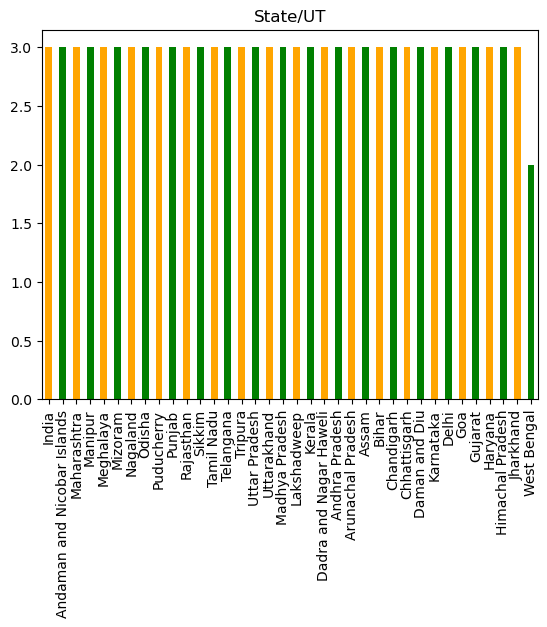

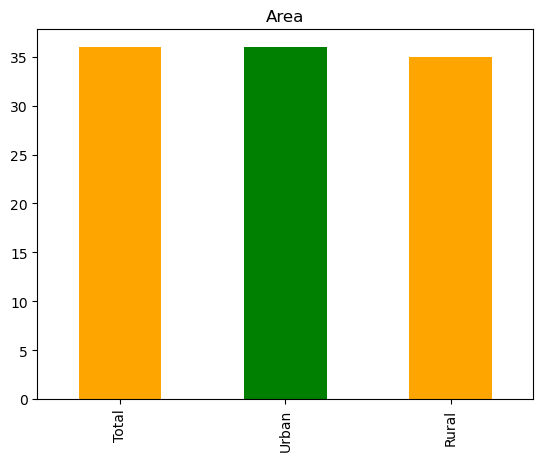

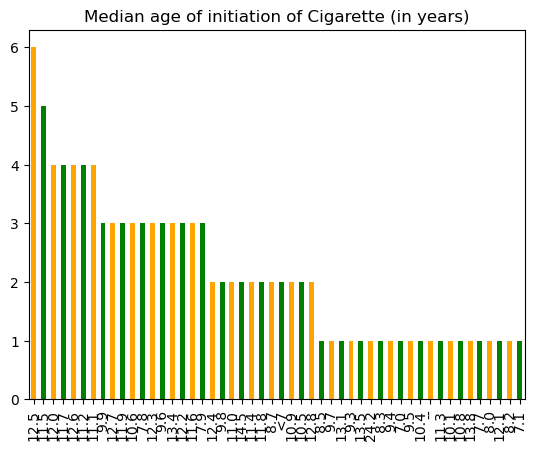

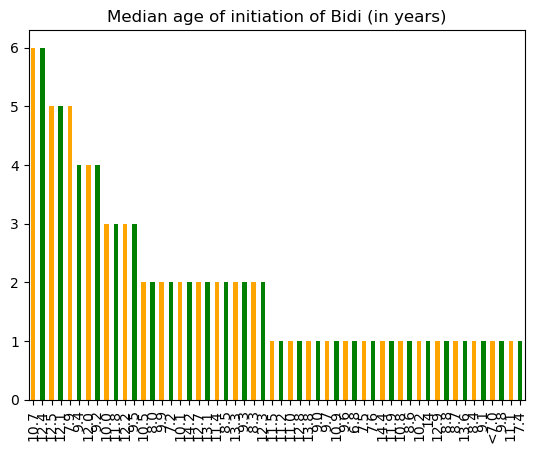

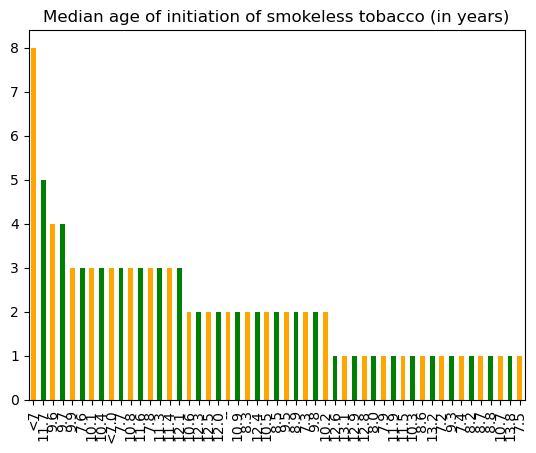

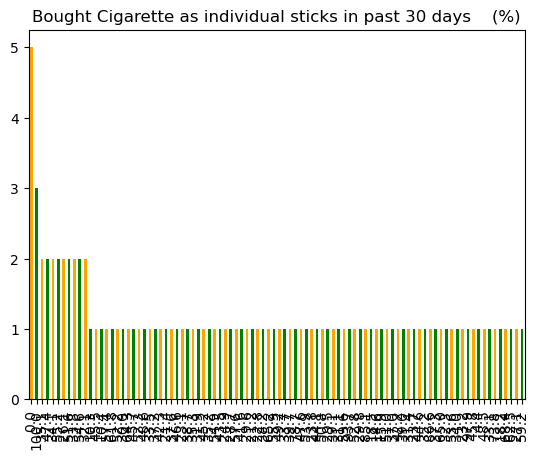

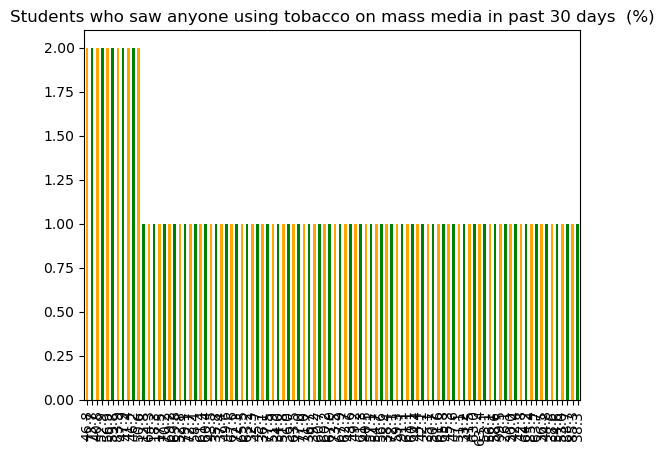

In [10]:
import matplotlib.pyplot as plt
colors = ['orange', 'green']
for col in categorical_columns:
    data[col].value_counts().plot(kind='bar',color=colors)
    plt.title(col)
    plt.show()

In [11]:
from sklearn.model_selection import train_test_split


target = 'Ever tobacco smokers who quit in last 12 months (%)'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2)

# Get the data types of each column in the training set
dtypes = X_train.dtypes

# Get the categorical columns in the training set
categorical_columns = dtypes[dtypes == 'object'].index

# Apply one-hot encoding to the categorical columns in the training set
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns)

# Apply one-hot encoding to the categorical columns in the test set
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns)

# Ensure that the test set has the same columns as the training set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Show the resulting DataFrames
print(X_train_encoded.head())
print(X_test_encoded.head())



    Ever tobacco users (%)  Current tobacco users (%)  \
41                     9.0                        2.6   
23                    19.1                        8.1   
6                      7.3                        2.6   
68                    42.7                       33.2   
3                     21.5                        4.4   

    Ever tobacco smokers (%)  Current tobacco smokers (%)  \
41                       3.7                          1.7   
23                       9.5                          6.8   
6                        4.4                          1.8   
68                      35.0                         29.0   
3                        8.8                          3.7   

    Ever cigarette users (%)  Current cigarette users (%)  \
41                       1.1                          0.5   
23                       6.6                          4.7   
6                        2.6                          1.1   
68                      23.6                  

In [12]:
X_train_encoded.head()

,Ever tobacco users (%),Current tobacco users (%),Ever tobacco smokers (%),Current tobacco smokers (%),Ever cigarette users (%),Current cigarette users (%),Ever bidi users (%),Current bidi users (%),Ever smokeless tobacco users (%),Current smokeless tobacco users (%),...,Students who saw anyone using tobacco on mass media in past 30 days (%)_72.7,Students who saw anyone using tobacco on mass media in past 30 days (%)_73.7,Students who saw anyone using tobacco on mass media in past 30 days (%)_77.0,Students who saw anyone using tobacco on mass media in past 30 days (%)_77.5,Students who saw anyone using tobacco on mass media in past 30 days (%)_79.1,Students who saw anyone using tobacco on mass media in past 30 days (%)_83.9,Students who saw anyone using tobacco on mass media in past 30 days (%)_85.3,Students who saw anyone using tobacco on mass media in past 30 days (%)_85.4,Students who saw anyone using tobacco on mass media in past 30 days (%)_88.7,Students who saw anyone using tobacco on mass media in past 30 days (%)_99.5
41,9.0,2.6,3.7,1.7,1.1,0.5,1.6,0.5,6.2,1.1,...,0,0,0,0,0,0,0,0,0,0
23,19.1,8.1,9.5,6.8,6.6,4.7,3.8,2.2,15.8,2.8,...,0,0,0,0,0,0,0,0,0,0
6,7.3,2.6,4.4,1.8,2.6,1.1,2.3,0.8,4.4,1.1,...,0,0,0,0,0,0,0,0,0,0
68,42.7,33.2,35.0,29.0,23.6,19.9,21.2,17.5,33.4,23.1,...,0,0,0,0,0,0,0,0,0,0
3,21.5,4.4,8.8,3.7,4.4,1.3,2.7,1.0,17.2,1.4,...,0,0,0,0,0,0,0,0,0,0


In [13]:

target = 'Ever tobacco smokers who quit in last 12 months (%)'


# Define the models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}

# Fit and evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train_encoded, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_encoded)

    # Calculate the mean absolute error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate the root mean squared error (RMSE)
    mse = (mean_squared_error(y_test, y_pred))

    # Print the results
    print(f'{name}:')
    print(f'  MAE: {mae:.2f}')
    print(f'  MSE: {mse:.2f}')



Linear Regression:
  MAE: 6.30
  MSE: 61.90
Ridge Regression:
  MAE: 5.70
  MSE: 59.31
Lasso Regression:
  MAE: 7.54
  MSE: 121.27
Elastic Net Regression:
  MAE: 7.74
  MSE: 131.37
Decision Tree Regression:
  MAE: 8.54
  MSE: 321.97
Random Forest Regression:
  MAE: 4.78
  MSE: 47.75
Gradient Boosting Regression:
  MAE: 5.50
  MSE: 65.49


# Guys if the dataset was helpful, please consider upvoting the **Dataset- Youth Tobacca Usage** if you want 😊 This will really help me grow in the field of datasets on Kaggle